In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [254]:
# subtract 10s exposure baseline then normalize
df = pd.read_csv("DataFramForYossi/san_fran_pre_irrad_wheel5/SP_B1_003.csv","\t")
df["counts_NoBaseline"] = (df["counts"]-1351)
df["counts_normalized"] = df["counts_NoBaseline"] / df["power_av"]
df2 = pd.read_csv("DataFramForYossi/san_fran_post_irrad_wheel5/SP_B1_003.csv","\t")
df2["counts_NoBaseline"] = (df2["counts"]-1351)
df2["counts_normalized"] = df2["counts_NoBaseline"] / df2["power_av"]
diff = df.copy()
diff["counts"] = df2["counts_normalized"] - df["counts_normalized"]

In [255]:
nm400 =(np.abs(after["em_wl"] - 400)).argmin()
nm750 =(np.abs(after["em_wl"] - 750)).argmin()
nm0 =(np.abs(after["em_wl"] - 100)).argmin()
print(after["counts"].iloc[nm0])
print((after["counts_normalized"].max())/(before["counts_normalized"].max()))
print((after["counts_normalized"].iloc[nm750])/(before["counts_normalized"].iloc[nm750]))
print((after["counts_normalized"].iloc[nm400])/(before["counts_normalized"].iloc[nm400]))

1349.0
1.9803789996816739
2.0563826071877913
1.2878327698526988


In [268]:
def plot1d(df,df2,diff,ex_wl=250,exp_time=10,spectro_wl=400,lpf=0):
    before = df[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
    after = df2[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
    diff250nm = diff[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
    plt.figure(1)
    plt.plot(after["em_wl"],  after["counts"],label = "after irr")
    plt.plot(before["em_wl"],  before["counts"],label = "before irr")
    plt.title("Raw")
    plt.legend()
    plt.yscale("log")
    plt.figure(2)
    plt.plot(after["em_wl"],  after["counts_normalized"],label = "after irr")
    plt.plot(before["em_wl"],  before["counts_normalized"],label = "before irr")
    plt.title("(Raw - basline)/power")
    plt.yscale("log")
    plt.legend()
    plt.figure(3)
    plt.plot(before["em_wl"],  diff250nm["counts"])
    plt.title("diff (Raw - basline)/power")
    plt.yscale("log")


/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


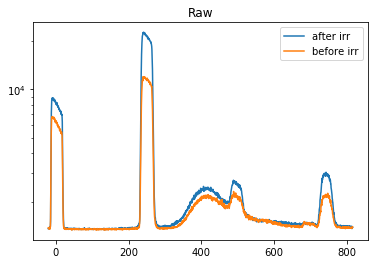

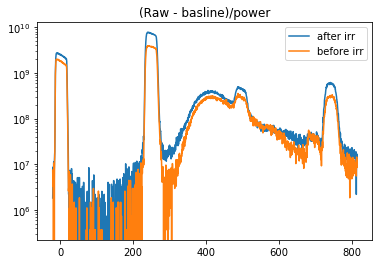

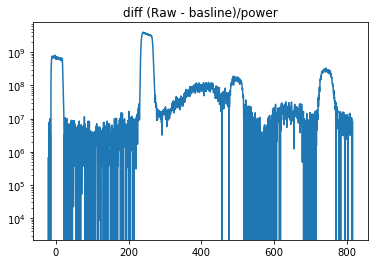

In [270]:
plot1d(df,df2,diff)

/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/weiss/Programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


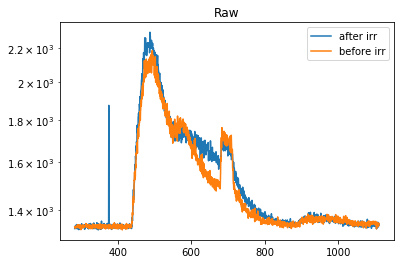

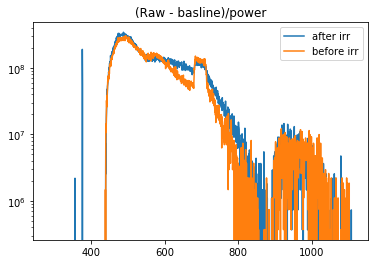

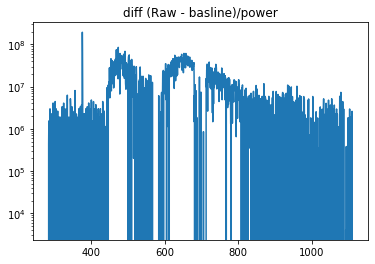

In [272]:
plot1d(df,df2,diff,ex_wl=250,exp_time=10,spectro_wl=700,lpf=450)

In [235]:
def plot2d(group,counts="counts"):
    mes_num = group["measurment_num"].nunique()
    size_of_array=len(group[counts])
    Z = (np.array(group[counts].values).reshape(mes_num,int(size_of_array/mes_num))).clip(0.1)
    X = group["em_wl"].unique()
    Y = group["ex_wl"].unique()
    plt.pcolor(Y,X,Z.T, norm=LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
    plt.colorbar()
def creat2d(df,exposre=10,counts="counts"):
    grouped = df[df["exp_time"]==exposre].groupby(['spectro_wl'])
    for name, group in grouped:
        if name == 400:
            plt.figure(1)
            plot2d(group,counts)
        if name == 700:
            plt.figure(2)
            group1_idx = np.logical_and(group["ex_wl"]<370,np.logical_or(group["lpf"]==0,group["lpf"]==400))
            group1 = group[group1_idx]
            plot2d(group1,counts)
            plt.figure(3)
            group2 = group[np.logical_not(group1_idx)]
            group1 = group[group1_idx]
            plot2d(group2,counts)

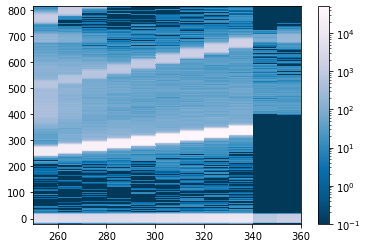

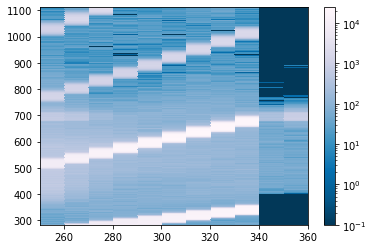

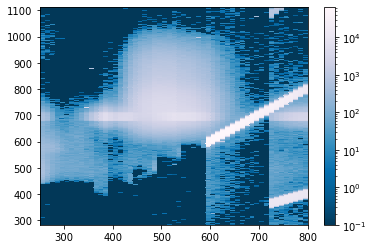

In [242]:
creat2d(df,counts="counts_NoBaseline")

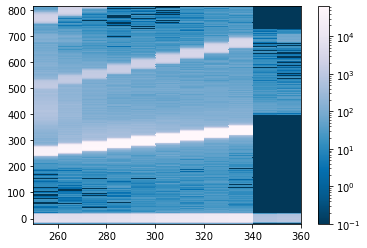

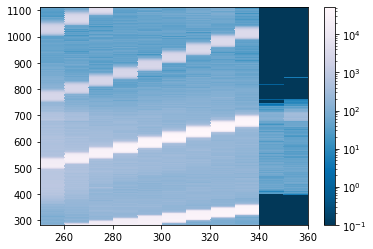

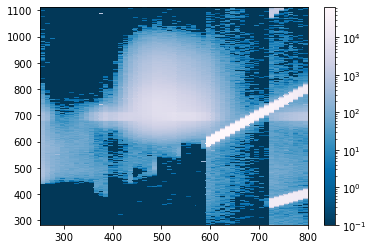

In [239]:
creat2d(df2,counts="counts_NoBaseline")

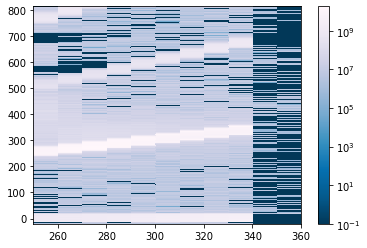

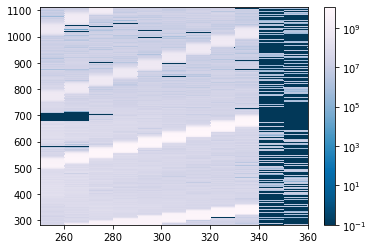

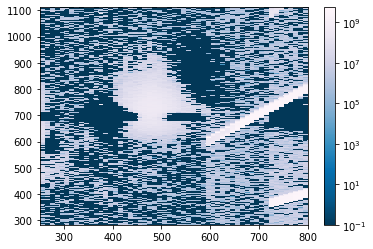

In [243]:
creat2d(diff,counts="counts")